In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spotipy as spt
import requests
import missingno
import seaborn as sns
sns.set()
#pip install spotipy --use-feature=2020-resolver

In [3]:
data= pd.read_json('StreamingHistory0.json')

In [4]:
data

,endTime,artistName,trackName,msPlayed
0,2020-08-14 10:29,Anderson .Paak,CUT EM IN (feat. Rick Ross),16183
1,2020-08-14 10:32,Anderson .Paak,CUT EM IN (feat. Rick Ross),177040
2,2020-08-14 10:35,Anderson .Paak,Yada Yada,172920
3,2020-08-14 10:39,Linkin Park,Somewhere I Belong,213933
4,2020-08-14 10:42,Linkin Park,BURN IT DOWN,230253
...,...,...,...,...
4290,2021-08-14 10:37,Dr. Dre,Bitches Ain't Shit,288560
4291,2021-08-14 10:42,The Pharcyde,I'm That Type Of Nigga,316826
4292,2021-08-14 10:47,Pete Rock & C.L. Smooth,They Reminisce Over You (T.R.O.Y.),286693
4293,2021-08-14 10:52,Pearl Jam,Jeremy,318226


In [82]:
data.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [83]:
data['msPlayed'] = data['msPlayed'].apply(lambda x: x/60000)

In [84]:
data.columns=['end', 'artist', 'track', 'time']

In [85]:
data

,end,artist,track,time
0,2020-08-14 10:29,Anderson .Paak,CUT EM IN (feat. Rick Ross),0.269717
1,2020-08-14 10:32,Anderson .Paak,CUT EM IN (feat. Rick Ross),2.950667
2,2020-08-14 10:35,Anderson .Paak,Yada Yada,2.882000
3,2020-08-14 10:39,Linkin Park,Somewhere I Belong,3.565550
4,2020-08-14 10:42,Linkin Park,BURN IT DOWN,3.837550
...,...,...,...,...
4290,2021-08-14 10:37,Dr. Dre,Bitches Ain't Shit,4.809333
4291,2021-08-14 10:42,The Pharcyde,I'm That Type Of Nigga,5.280433
4292,2021-08-14 10:47,Pete Rock & C.L. Smooth,They Reminisce Over You (T.R.O.Y.),4.778217
4293,2021-08-14 10:52,Pearl Jam,Jeremy,5.303767


## Remove Podcasts

C:\Users\HarryThu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

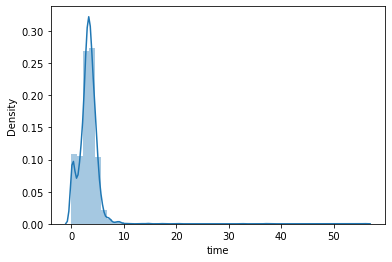

In [86]:
sns.distplot(data['time'])

In [87]:
data=data[data['time']<10] # remove anything more than 10mins such as podcasts 

In [88]:
data

,end,artist,track,time
0,2020-08-14 10:29,Anderson .Paak,CUT EM IN (feat. Rick Ross),0.269717
1,2020-08-14 10:32,Anderson .Paak,CUT EM IN (feat. Rick Ross),2.950667
2,2020-08-14 10:35,Anderson .Paak,Yada Yada,2.882000
3,2020-08-14 10:39,Linkin Park,Somewhere I Belong,3.565550
4,2020-08-14 10:42,Linkin Park,BURN IT DOWN,3.837550
...,...,...,...,...
4290,2021-08-14 10:37,Dr. Dre,Bitches Ain't Shit,4.809333
4291,2021-08-14 10:42,The Pharcyde,I'm That Type Of Nigga,5.280433
4292,2021-08-14 10:47,Pete Rock & C.L. Smooth,They Reminisce Over You (T.R.O.Y.),4.778217
4293,2021-08-14 10:52,Pearl Jam,Jeremy,5.303767


C:\Users\HarryThu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time', ylabel='Density'>

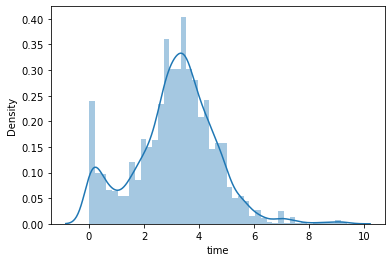

In [89]:
sns.distplot(data['time'])

## Sort by Time (Ascending)

In [90]:
data_sorted=data.sort_values(by=['time'],ascending=True)
data_sorted.head(35)

,end,artist,track,time
3684,2021-07-04 06:38,Linkin Park,Papercut,0.000000
3779,2021-07-13 18:16,The Weeknd,What You Need - Original,0.000000
131,2020-10-05 15:40,Post Malone,I'm Gonna Be,0.000000
285,2020-10-20 11:40,Red Hot Chili Peppers,Otherside,0.000000
3739,2021-07-11 14:10,Twenty One Pilots,Choker,0.000000
3291,2021-05-24 08:35,Popular Front,110. Resisting Myanmar's Military Coup,0.000000
3790,2021-07-13 18:20,Maroon 5,She Will Be Loved - Radio Mix,0.000000
3697,2021-07-04 07:24,YEAR OF THE OX,Love Bites,0.000000
3686,2021-07-04 06:39,Blue Swede,Hooked on a Feeling,0.000000
3667,2021-06-30 06:50,MF DOOM,?,0.000000


In [91]:
data_min_played=data_sorted[data_sorted['time']>0.17].reset_index(drop=True) # remove anything less than 10 seconds

In [92]:
data_min_played

,end,artist,track,time
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167
4,2020-12-14 06:25,Eminem,Darkness,0.174917
...,...,...,...,...
4089,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433
4090,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733
4091,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733
4092,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667


## Token

In [261]:
username = '-'
client_id ='-'
client_secret = '-' #create a spotify developer account and add an app. You can add your keys here
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = spt.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [293]:
print(token)

0


## Functions

https://developer.spotify.com/console/get-search-item/
documentation for seraching

curl -X "GET" "https://api.spotify.com/v1/search" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer "

### Get Track ID Function

In [95]:
def get_id(track_name: str, token: str) -> str:
    try: 
        headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'Authorization': 'Bearer '+token,
        }
        params =(('q', track_name),('type', 'track'))
        response = requests.get('https://api.spotify.com/v1/search', 
                        headers = headers, params = params, timeout = 5)
        json = response.json()  
        id=json['tracks']['items'][0]['id']
        return id
    except:
        return 0

    

In [219]:
test_result = get_id('Numb', token)
test_result

'2nLtzopw4rPReszdYBJU6h'

### Get Track Features Function

In [233]:
def get_features(track_id: str, token: str) -> dict:
    sp = spt.Spotify(auth=token)
    features = sp.audio_features([track_id])
    return features[0]
  

In [316]:
test_features = get_features(test_result, token)
test_features

{'danceability': 0.496,
 'energy': 0.863,
 'key': 9,
 'loudness': -4.153,
 'mode': 1,
 'speechiness': 0.0381,
 'acousticness': 0.0046,
 'instrumentalness': 0,
 'liveness': 0.639,
 'valence': 0.243,
 'tempo': 110.018,
 'type': 'audio_features',
 'id': '2nLtzopw4rPReszdYBJU6h',
 'uri': 'spotify:track:2nLtzopw4rPReszdYBJU6h',
 'track_href': 'https://api.spotify.com/v1/tracks/2nLtzopw4rPReszdYBJU6h',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2nLtzopw4rPReszdYBJU6h',
 'duration_ms': 185587,
 'time_signature': 4}

## Get Track ID

In [99]:
track_list={}
count=0
for track in data_min_played['track']:
    if not (track in track_list):
        try:
            entry={track: get_id(track,token)}
            track_list.update(entry)          
        except IndexError as error:
            data_min_played=data_min_played.drop(count)
            count=count-1
    count+=1
            

In [100]:
track_list['Haribo']

'4NpqN2fQpnnfRHzB1bcApj'

In [101]:
data_with_id=data_min_played
data_with_id

,end,artist,track,time
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167
4,2020-12-14 06:25,Eminem,Darkness,0.174917
...,...,...,...,...
4089,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433
4090,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733
4091,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733
4092,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667


## Add ID to Dataframe

In [102]:
data_with_id['id']=data_with_id['track'].apply(lambda row: track_list[row])
data_with_id

,end,artist,track,time,id
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d
...,...,...,...,...,...
4089,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW
4090,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4091,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4092,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA


### Deal with missing values

Find number of missing values

In [103]:
no_result=data_with_id['id'].apply(lambda x: x==0).sum()
no_result

11

In [104]:
data_with_id.loc[data_with_id['id'] == 0]

,end,artist,track,time,id
89,2020-11-03 16:33,Stuff You Should Know,SYSK Selects: How Bigfoot Works,0.317667,0
180,2020-11-03 16:33,Casefile True Crime,Case 161: The Yosemite Sightseer Murders (Part 1),0.575667,0
458,2020-11-17 11:31,Prof,Cousins (feat. Cashinova),1.546883,0
767,2020-12-07 13:20,Chet Baker,While My Lady Sleeps - Album Version - (take 1...,2.156500,0
1082,2021-05-10 10:59,Statik Selektah,Time (feat. Jack Harlow),2.545450,0
1422,2021-05-24 08:39,Popular Front,110. Resisting Myanmar's Military Coup,2.855000,0
1621,2021-05-10 10:38,Statik Selektah,"Keep It Moving (feat. Nas, Joey Bada$$, & Gary...",2.975533,0
3301,2020-10-20 15:20,Chet Baker,While My Lady Sleeps - Album Version - (take 1...,4.311100,0
3302,2020-11-08 09:37,Chet Baker,While My Lady Sleeps - Album Version - (take 1...,4.311100,0
3303,2020-10-27 08:25,Chet Baker,While My Lady Sleeps - Album Version - (take 1...,4.311100,0


Drop these rows

In [105]:
data_with_all_id=data_with_id.drop([180, 458, 767, 1082, 1422, 1621, 3301, 3302, 3303, 3724, 89])

Check if there are still 0 values

In [106]:
data_with_all_id.loc[data_with_id['id'] == 0]

,end,artist,track,time,id


In [107]:
data_with_all_id

,end,artist,track,time,id
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d
...,...,...,...,...,...
4089,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW
4090,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4091,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4092,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA


In [108]:
data_with_all_id=data_with_all_id.reset_index(drop=True) 
data_with_all_id

,end,artist,track,time,id
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d
...,...,...,...,...,...
4078,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW
4079,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4080,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4081,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA


## Get Track Features


In [109]:
features={}

In [110]:
track_list

{'Streets Of Cairo': '2mpfYRP2Pm77xHXiRBaPg7',
 'BATTY BOYZ': '4c8PKBYZm3OVF5boel6Q4c',
 'Doves In The Wind (feat. Kendrick Lamar)': '593W4qZOwwdqF6YnimJjL6',
 'Bitch Slap': '0lDQyQYmKzE0er8Ci8mIWQ',
 'Darkness': '5SiZJoLXp3WOl3J4C8IK0d',
 'Fast Lane': '2c5Isyd07hWsl7AQia2Dig',
 "BUMPY'S MESSAGE": '5cpGo1hrePIJFtip7Xtdd0',
 'The Sound Of Silence': '1Cj2vqUwlJVG27gJrun92y',
 'Arizona (feat. AUGUST 08)': '3q0UN40vV6mI7TT560Ry5l',
 'LIGHTWORKS': '2IDp0BQ8Jo5BIYNA9t9Eka',
 'All Caps': '21O0XXPEWPtePt5RMY93Ob',
 'Hoe Cakes': '40155dfa7olSEyn4voiTSB',
 'Higher': '6oJ6le65B3SEqPwMRNXWjY',
 "THAT'S THAT": '3ZWc3Bm8eUMRRJhSWKHHeV',
 'K.B.B': '0N03IPXqxjoRCGc1BYmlmW',
 'Wow Freestyle (feat. Kendrick Lamar)': '0gV5B7zmJkS1aaH9APokrH',
 "What I've Done": '18lR4BzEs7e3qzc0KVkTpU',
 'Choker': '732E6ibFkQR5lNIPEeiEnx',
 'One More Light': '3xXBsjrbG1xQIm1xv1cKOt',
 'Tonya - Skit': '1meOg8wHrLsxqD4mwW2YM2',
 'Thus Far - Interlude': '435kMcZJuXJJwKelsDjP4R',
 'Om - Edit': '4XxkCL8qAoz8vZ2g5JdvAl',
 'Mea

In [115]:
for id in data_with_all_id['id']:
    entry={id: get_features(id,token)}
    if entry[id] is None:
        data_with_all_id = data_with_all_id[data_with_all_id.id != id]
    else:
        features.update(entry) 
   
    

In [42]:
features

{'2mpfYRP2Pm77xHXiRBaPg7': {'danceability': 0.699,
  'energy': 0.212,
  'key': 4,
  'loudness': -11.411,
  'mode': 0,
  'speechiness': 0.323,
  'acousticness': 0.908,
  'instrumentalness': 0,
  'liveness': 0.076,
  'valence': 0.466,
  'tempo': 106.364,
  'type': 'audio_features',
  'id': '2mpfYRP2Pm77xHXiRBaPg7',
  'uri': 'spotify:track:2mpfYRP2Pm77xHXiRBaPg7',
  'track_href': 'https://api.spotify.com/v1/tracks/2mpfYRP2Pm77xHXiRBaPg7',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2mpfYRP2Pm77xHXiRBaPg7',
  'duration_ms': 166080,
  'time_signature': 4},
 '4c8PKBYZm3OVF5boel6Q4c': {'danceability': 0.669,
  'energy': 0.712,
  'key': 9,
  'loudness': -4.508,
  'mode': 1,
  'speechiness': 0.475,
  'acousticness': 0.291,
  'instrumentalness': 0,
  'liveness': 0.117,
  'valence': 0.839,
  'tempo': 119.831,
  'type': 'audio_features',
  'id': '4c8PKBYZm3OVF5boel6Q4c',
  'uri': 'spotify:track:4c8PKBYZm3OVF5boel6Q4c',
  'track_href': 'https://api.spotify.com/v1/tracks/4c8PKBYZm3O

convert to dataframe

In [121]:
data_with_all_id=data_with_all_id.reset_index()

In [125]:
data_with_all_id=data_with_all_id[['end', 'artist', 'track', 'time', 'id']]

In [126]:
data_with_all_id

,end,artist,track,time,id
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d
...,...,...,...,...,...
4077,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW
4078,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4079,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4080,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA


In [117]:
df_features=pd.DataFrame()
for row in range(0,len(data_with_all_id)):
    df_features=df_features.append(features[data_with_all_id.iloc[row,4]], ignore_index=True)  
    

In [732]:
import json

with open('features.json', 'w') as fp:
    json.dump(features, fp,  indent=4)

In [118]:
df_features

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.90800,https://api.spotify.com/v1/audio-analysis/2mpf...,0.699,166080.0,0.21200,2mpfYRP2Pm77xHXiRBaPg7,0.000000,4.0,0.076,-11.411,0.0,0.3230,106.364,4.0,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,audio_features,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,0.4660
1,0.29100,https://api.spotify.com/v1/audio-analysis/4c8P...,0.669,196120.0,0.71200,4c8PKBYZm3OVF5boel6Q4c,0.000000,9.0,0.117,-4.508,1.0,0.4750,119.831,5.0,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,audio_features,spotify:track:4c8PKBYZm3OVF5boel6Q4c,0.8390
2,0.34300,https://api.spotify.com/v1/audio-analysis/593W...,0.693,266080.0,0.71300,593W4qZOwwdqF6YnimJjL6,0.000000,10.0,0.102,-4.489,0.0,0.3510,137.335,4.0,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,audio_features,spotify:track:593W4qZOwwdqF6YnimJjL6,0.6150
3,0.00259,https://api.spotify.com/v1/audio-analysis/0lDQ...,0.477,232886.0,0.76300,0lDQyQYmKzE0er8Ci8mIWQ,0.000000,1.0,0.392,-5.184,1.0,0.1240,162.062,4.0,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,audio_features,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,0.3460
4,0.00998,https://api.spotify.com/v1/audio-analysis/5SiZ...,0.671,337147.0,0.62300,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2.0,0.643,-7.161,1.0,0.3080,75.055,4.0,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,audio_features,spotify:track:5SiZJoLXp3WOl3J4C8IK0d,0.1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,0.94100,https://api.spotify.com/v1/audio-analysis/4l9h...,0.438,141133.0,0.00756,4l9hml2UCnxoNI3yCdL1BW,0.006430,0.0,0.109,-26.440,0.0,0.0382,133.320,4.0,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,0.2770
4078,0.91300,https://api.spotify.com/v1/audio-analysis/4xQv...,0.367,553245.0,0.08940,4xQvvwFiWaJXwwqQxCs6Nh,0.877000,7.0,0.105,-22.206,1.0,0.0381,116.560,4.0,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,0.0393
4079,0.91300,https://api.spotify.com/v1/audio-analysis/4xQv...,0.367,553245.0,0.08940,4xQvvwFiWaJXwwqQxCs6Nh,0.877000,7.0,0.105,-22.206,1.0,0.0381,116.560,4.0,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,0.0393
4080,0.97800,https://api.spotify.com/v1/audio-analysis/6oSm...,0.588,205667.0,0.03870,6oSm3mBWFxJHEnjE2IqhmA,0.823000,0.0,0.116,-17.944,0.0,0.0600,83.400,4.0,https://api.spotify.com/v1/tracks/6oSm3mBWFxJH...,audio_features,spotify:track:6oSm3mBWFxJHEnjE2IqhmA,0.3420


Rearrange Columns based on original keys

In [127]:
cols = features['2mpfYRP2Pm77xHXiRBaPg7'].keys()
cols

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [128]:
df_features=df_features[cols]
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.699,0.21200,4.0,-11.411,0.0,0.3230,0.90800,0.000000,0.076,0.4660,106.364,audio_features,2mpfYRP2Pm77xHXiRBaPg7,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,https://api.spotify.com/v1/audio-analysis/2mpf...,166080.0,4.0
1,0.669,0.71200,9.0,-4.508,1.0,0.4750,0.29100,0.000000,0.117,0.8390,119.831,audio_features,4c8PKBYZm3OVF5boel6Q4c,spotify:track:4c8PKBYZm3OVF5boel6Q4c,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0,5.0
2,0.693,0.71300,10.0,-4.489,0.0,0.3510,0.34300,0.000000,0.102,0.6150,137.335,audio_features,593W4qZOwwdqF6YnimJjL6,spotify:track:593W4qZOwwdqF6YnimJjL6,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,https://api.spotify.com/v1/audio-analysis/593W...,266080.0,4.0
3,0.477,0.76300,1.0,-5.184,1.0,0.1240,0.00259,0.000000,0.392,0.3460,162.062,audio_features,0lDQyQYmKzE0er8Ci8mIWQ,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,https://api.spotify.com/v1/audio-analysis/0lDQ...,232886.0,4.0
4,0.671,0.62300,2.0,-7.161,1.0,0.3080,0.00998,0.000008,0.643,0.1950,75.055,audio_features,5SiZJoLXp3WOl3J4C8IK0d,spotify:track:5SiZJoLXp3WOl3J4C8IK0d,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,0.438,0.00756,0.0,-26.440,0.0,0.0382,0.94100,0.006430,0.109,0.2770,133.320,audio_features,4l9hml2UCnxoNI3yCdL1BW,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0,4.0
4078,0.367,0.08940,7.0,-22.206,1.0,0.0381,0.91300,0.877000,0.105,0.0393,116.560,audio_features,4xQvvwFiWaJXwwqQxCs6Nh,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4079,0.367,0.08940,7.0,-22.206,1.0,0.0381,0.91300,0.877000,0.105,0.0393,116.560,audio_features,4xQvvwFiWaJXwwqQxCs6Nh,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4080,0.588,0.03870,0.0,-17.944,0.0,0.0600,0.97800,0.823000,0.116,0.3420,83.400,audio_features,6oSm3mBWFxJHEnjE2IqhmA,spotify:track:6oSm3mBWFxJHEnjE2IqhmA,https://api.spotify.com/v1/tracks/6oSm3mBWFxJH...,https://api.spotify.com/v1/audio-analysis/6oSm...,205667.0,4.0


In [129]:
d1=pd.DataFrame()
d1=df_features[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']]
d1 #had to manually input the column because i was facing a bug where i cant drop the id column

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0.699,0.21200,4.0,-11.411,0.0,0.3230,0.90800,0.000000,0.076,0.4660,106.364,audio_features,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,https://api.spotify.com/v1/audio-analysis/2mpf...,166080.0,4.0
1,0.669,0.71200,9.0,-4.508,1.0,0.4750,0.29100,0.000000,0.117,0.8390,119.831,audio_features,spotify:track:4c8PKBYZm3OVF5boel6Q4c,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0,5.0
2,0.693,0.71300,10.0,-4.489,0.0,0.3510,0.34300,0.000000,0.102,0.6150,137.335,audio_features,spotify:track:593W4qZOwwdqF6YnimJjL6,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,https://api.spotify.com/v1/audio-analysis/593W...,266080.0,4.0
3,0.477,0.76300,1.0,-5.184,1.0,0.1240,0.00259,0.000000,0.392,0.3460,162.062,audio_features,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,https://api.spotify.com/v1/audio-analysis/0lDQ...,232886.0,4.0
4,0.671,0.62300,2.0,-7.161,1.0,0.3080,0.00998,0.000008,0.643,0.1950,75.055,audio_features,spotify:track:5SiZJoLXp3WOl3J4C8IK0d,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,0.438,0.00756,0.0,-26.440,0.0,0.0382,0.94100,0.006430,0.109,0.2770,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0,4.0
4078,0.367,0.08940,7.0,-22.206,1.0,0.0381,0.91300,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4079,0.367,0.08940,7.0,-22.206,1.0,0.0381,0.91300,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4080,0.588,0.03870,0.0,-17.944,0.0,0.0600,0.97800,0.823000,0.116,0.3420,83.400,audio_features,spotify:track:6oSm3mBWFxJHEnjE2IqhmA,https://api.spotify.com/v1/tracks/6oSm3mBWFxJH...,https://api.spotify.com/v1/audio-analysis/6oSm...,205667.0,4.0


In [130]:
d2=data_with_all_id
d2


,end,artist,track,time,id
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d
...,...,...,...,...,...
4077,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW
4078,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4079,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh
4080,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA


In [131]:
d3 = pd.concat([d2, d1], axis=1)
d3

,end,artist,track,time,id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7,0.699,0.21200,4.0,-11.411,0.0,...,0.000000,0.076,0.4660,106.364,audio_features,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,https://api.spotify.com/v1/audio-analysis/2mpf...,166080.0,4.0
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c,0.669,0.71200,9.0,-4.508,1.0,...,0.000000,0.117,0.8390,119.831,audio_features,spotify:track:4c8PKBYZm3OVF5boel6Q4c,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0,5.0
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6,0.693,0.71300,10.0,-4.489,0.0,...,0.000000,0.102,0.6150,137.335,audio_features,spotify:track:593W4qZOwwdqF6YnimJjL6,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,https://api.spotify.com/v1/audio-analysis/593W...,266080.0,4.0
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ,0.477,0.76300,1.0,-5.184,1.0,...,0.000000,0.392,0.3460,162.062,audio_features,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,https://api.spotify.com/v1/audio-analysis/0lDQ...,232886.0,4.0
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.62300,2.0,-7.161,1.0,...,0.000008,0.643,0.1950,75.055,audio_features,spotify:track:5SiZJoLXp3WOl3J4C8IK0d,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW,0.438,0.00756,0.0,-26.440,0.0,...,0.006430,0.109,0.2770,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0,4.0
4078,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4079,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4080,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA,0.588,0.03870,0.0,-17.944,0.0,...,0.823000,0.116,0.3420,83.400,audio_features,spotify:track:6oSm3mBWFxJHEnjE2IqhmA,https://api.spotify.com/v1/tracks/6oSm3mBWFxJH...,https://api.spotify.com/v1/audio-analysis/6oSm...,205667.0,4.0


In [135]:
completed_data=d3
completed_data.to_csv('completed_data.csv')


In [2]:
completed_data=pd.read_csv('completed_data.csv',index_col=0)

In [3]:
completed_data

,end,artist,track,time,id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7,0.699,0.21200,4.0,-11.411,0.0,...,0.000000,0.076,0.4660,106.364,audio_features,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,https://api.spotify.com/v1/audio-analysis/2mpf...,166080.0,4.0
1,2021-01-23 13:49,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c,0.669,0.71200,9.0,-4.508,1.0,...,0.000000,0.117,0.8390,119.831,audio_features,spotify:track:4c8PKBYZm3OVF5boel6Q4c,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0,5.0
2,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6,0.693,0.71300,10.0,-4.489,0.0,...,0.000000,0.102,0.6150,137.335,audio_features,spotify:track:593W4qZOwwdqF6YnimJjL6,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,https://api.spotify.com/v1/audio-analysis/593W...,266080.0,4.0
3,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ,0.477,0.76300,1.0,-5.184,1.0,...,0.000000,0.392,0.3460,162.062,audio_features,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,https://api.spotify.com/v1/audio-analysis/0lDQ...,232886.0,4.0
4,2020-12-14 06:25,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.62300,2.0,-7.161,1.0,...,0.000008,0.643,0.1950,75.055,audio_features,spotify:track:5SiZJoLXp3WOl3J4C8IK0d,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW,0.438,0.00756,0.0,-26.440,0.0,...,0.006430,0.109,0.2770,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0,4.0
4078,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4079,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
4080,2021-01-12 03:24,Stan Getz Quartet,There Will Never Be Another You,9.340667,6oSm3mBWFxJHEnjE2IqhmA,0.588,0.03870,0.0,-17.944,0.0,...,0.823000,0.116,0.3420,83.400,audio_features,spotify:track:6oSm3mBWFxJHEnjE2IqhmA,https://api.spotify.com/v1/tracks/6oSm3mBWFxJH...,https://api.spotify.com/v1/audio-analysis/6oSm...,205667.0,4.0


# Analysis of my top 20 played artists

In [4]:
artist_timed = pd.DataFrame(completed_data.groupby('artist')['time'].sum().sort_index().sort_values(ascending=False).reset_index())
artist_timed.columns =['artist', 'total_time']
artist_timed.head(20)

,artist,total_time
0,Linkin Park,1682.400833
1,Eminem,1651.556200
2,MF DOOM,1074.721900
3,YEAR OF THE OX,616.435317
4,Chet Baker,250.492983
5,Red Hot Chili Peppers,250.217533
6,Dumbfoundead,198.630067
7,Madvillain,172.090617
8,Logic,171.762550
9,J. Cole,150.986567


In [188]:
artist_played = pd.DataFrame(completed_data.groupby('artist')['time'].count().sort_index().sort_values(ascending=False).reset_index())
artist_played.columns =['artist', 'total_played']
artist=artist_played
artist.head(20)


,artist,total_played
0,Linkin Park,519
1,Eminem,504
2,MF DOOM,387
3,YEAR OF THE OX,228
4,Madvillain,85
5,Dumbfoundead,64
6,Red Hot Chili Peppers,61
7,Logic,52
8,Chet Baker,51
9,J. Cole,40


Here I have 2 different ways of figuring out my top 20 artists. The first data frame is based on the total time I spent listening to them. The second data frame is based on the number of times I played them.

The first one is biased because certain artists have longer songs. 

**Example:** Chet Baker has a total_time of 250 minutes meanwhile I played his songs only 51 times. While I played Logic the same amount of times, he is ranked significantly lower at 171 minutes. 

For the rest of the analysis, I will be basing my Top 20 artists on the number of times I played their songs. Next I want to make some comparisons between my top 20 songs and the rest of my songs to see if there are any interesting patterns.

In [6]:
top20list=list(artist.iloc[:20,0])
df_top_20=pd.DataFrame()
for x in range(0,20):
    df_top_20=df_top_20.append(completed_data.loc[completed_data['artist'] == top20list[x]])    
df_top_20

,end,artist,track,time,id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
16,2021-04-06 06:43,Linkin Park,What I've Done,0.203783,18lR4BzEs7e3qzc0KVkTpU,0.623,0.930,5.0,-5.285,1.0,...,0.000002,0.1380,0.287,120.119,audio_features,spotify:track:18lR4BzEs7e3qzc0KVkTpU,https://api.spotify.com/v1/tracks/18lR4BzEs7e3...,https://api.spotify.com/v1/audio-analysis/18lR...,205613.0,4.0
18,2021-05-06 06:22,Linkin Park,One More Light,0.205500,3xXBsjrbG1xQIm1xv1cKOt,0.593,0.200,8.0,-11.063,1.0,...,0.000000,0.0897,0.170,83.966,audio_features,spotify:track:3xXBsjrbG1xQIm1xv1cKOt,https://api.spotify.com/v1/tracks/3xXBsjrbG1xQ...,https://api.spotify.com/v1/audio-analysis/3xXB...,255067.0,4.0
23,2021-01-01 15:23,Linkin Park,Breaking the Habit,0.209500,3dxiWIBVJRlqh9xk144rf4,0.579,0.849,4.0,-5.218,0.0,...,0.000000,0.0909,0.581,100.021,audio_features,spotify:track:3dxiWIBVJRlqh9xk144rf4,https://api.spotify.com/v1/tracks/3dxiWIBVJRlq...,https://api.spotify.com/v1/audio-analysis/3dxi...,196907.0,4.0
31,2020-12-03 15:33,Linkin Park,Numb,0.225617,2nLtzopw4rPReszdYBJU6h,0.496,0.863,9.0,-4.153,1.0,...,0.000000,0.6390,0.243,110.018,audio_features,spotify:track:2nLtzopw4rPReszdYBJU6h,https://api.spotify.com/v1/tracks/2nLtzopw4rPR...,https://api.spotify.com/v1/audio-analysis/2nLt...,185587.0,4.0
36,2020-12-05 07:14,Linkin Park,In the End,0.245267,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3.0,-5.870,0.0,...,0.000000,0.2090,0.400,105.143,audio_features,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,2021-08-05 14:51,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,...,0.000000,0.0830,0.301,174.152,audio_features,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0,4.0
3344,2021-07-13 18:29,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,...,0.000000,0.0830,0.301,174.152,audio_features,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0,4.0
3345,2020-11-17 09:57,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,...,0.000000,0.0830,0.301,174.152,audio_features,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0,4.0
3346,2021-03-18 08:16,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,...,0.000000,0.0830,0.301,174.152,audio_features,spotify:track:0kN8xEmgMW9mh7UmDYHlJP,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0,4.0


In [205]:
df_the_rest=completed_data
for x in range(0,20):
    df_the_rest=df_the_rest.drop(df_the_rest[df_the_rest.artist == top20list[x]].index)    
df_the_rest=df_the_rest.reset_index(drop=True)
df_the_rest

#df = df.drop(df[df.score < 50].index)

,end,artist,track,time,id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2021-07-11 14:05,Redlight Special 1908 Sextrola Orchestrion,Streets Of Cairo,0.171433,2mpfYRP2Pm77xHXiRBaPg7,0.699,0.21200,4.0,-11.411,0.0,...,0.000000,0.076,0.4660,106.364,audio_features,spotify:track:2mpfYRP2Pm77xHXiRBaPg7,https://api.spotify.com/v1/tracks/2mpfYRP2Pm77...,https://api.spotify.com/v1/audio-analysis/2mpf...,166080.0,4.0
1,2021-08-10 05:47,SZA,Doves In The Wind (feat. Kendrick Lamar),0.173167,593W4qZOwwdqF6YnimJjL6,0.693,0.71300,10.0,-4.489,0.0,...,0.000000,0.102,0.6150,137.335,audio_features,spotify:track:593W4qZOwwdqF6YnimJjL6,https://api.spotify.com/v1/tracks/593W4qZOwwdq...,https://api.spotify.com/v1/audio-analysis/593W...,266080.0,4.0
2,2020-09-12 11:12,Tech N9ne,Bitch Slap,0.173167,0lDQyQYmKzE0er8Ci8mIWQ,0.477,0.76300,1.0,-5.184,1.0,...,0.000000,0.392,0.3460,162.062,audio_features,spotify:track:0lDQyQYmKzE0er8Ci8mIWQ,https://api.spotify.com/v1/tracks/0lDQyQYmKzE0...,https://api.spotify.com/v1/audio-analysis/0lDQ...,232886.0,4.0
3,2021-06-30 06:49,Bad Meets Evil,Fast Lane,0.174917,2c5Isyd07hWsl7AQia2Dig,0.615,0.87100,1.0,-3.804,1.0,...,0.000000,0.246,0.3380,119.149,audio_features,spotify:track:2c5Isyd07hWsl7AQia2Dig,https://api.spotify.com/v1/tracks/2c5Isyd07hWs...,https://api.spotify.com/v1/audio-analysis/2c5I...,249560.0,5.0
4,2020-09-09 13:44,Dan Vasc,The Sound Of Silence,0.179667,1Cj2vqUwlJVG27gJrun92y,0.322,0.28000,6.0,-9.367,0.0,...,0.000001,0.102,0.1750,85.794,audio_features,spotify:track:1Cj2vqUwlJVG27gJrun92y,https://api.spotify.com/v1/tracks/1Cj2vqUwlJVG...,https://api.spotify.com/v1/audio-analysis/1Cj2...,248467.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2020-12-16 08:38,Red Garland Trio,'Tis Autumn,9.130433,4Gv9rfzkqUZp3iE3JBTcd6,0.591,0.15100,0.0,-18.003,0.0,...,0.810000,0.166,0.1830,72.210,audio_features,spotify:track:4Gv9rfzkqUZp3iE3JBTcd6,https://api.spotify.com/v1/tracks/4Gv9rfzkqUZp...,https://api.spotify.com/v1/audio-analysis/4Gv9...,547827.0,4.0
1817,2020-11-08 08:53,Grant Green,My Funny Valentine,9.154433,4l9hml2UCnxoNI3yCdL1BW,0.438,0.00756,0.0,-26.440,0.0,...,0.006430,0.109,0.2770,133.320,audio_features,spotify:track:4l9hml2UCnxoNI3yCdL1BW,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0,4.0
1818,2020-11-02 10:42,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0
1819,2020-11-11 11:41,Bill Evans,"Symbiosis, 2nd Movement: Largo - Andante - Mae...",9.220733,4xQvvwFiWaJXwwqQxCs6Nh,0.367,0.08940,7.0,-22.206,1.0,...,0.877000,0.105,0.0393,116.560,audio_features,spotify:track:4xQvvwFiWaJXwwqQxCs6Nh,https://api.spotify.com/v1/tracks/4xQvvwFiWaJX...,https://api.spotify.com/v1/audio-analysis/4xQv...,553245.0,4.0


## Artists

<AxesSubplot:title={'center':'Total played time for top 20 artists'}, xlabel='time', ylabel='artist'>

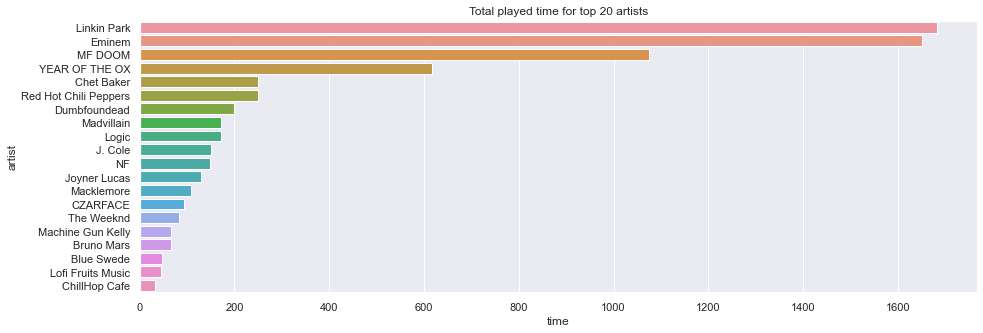

In [23]:
df=pd.DataFrame(df_top_20.groupby('artist')['time'].agg(sum).sort_index().sort_values(ascending=False).reset_index())
df.columns =['artist', 'time']
plt.figure(figsize=(15,5))
plt.title("Total played time for top 20 artists")
sns.barplot(y=df['artist'], x=df['time'])


## Comparison with the rest 

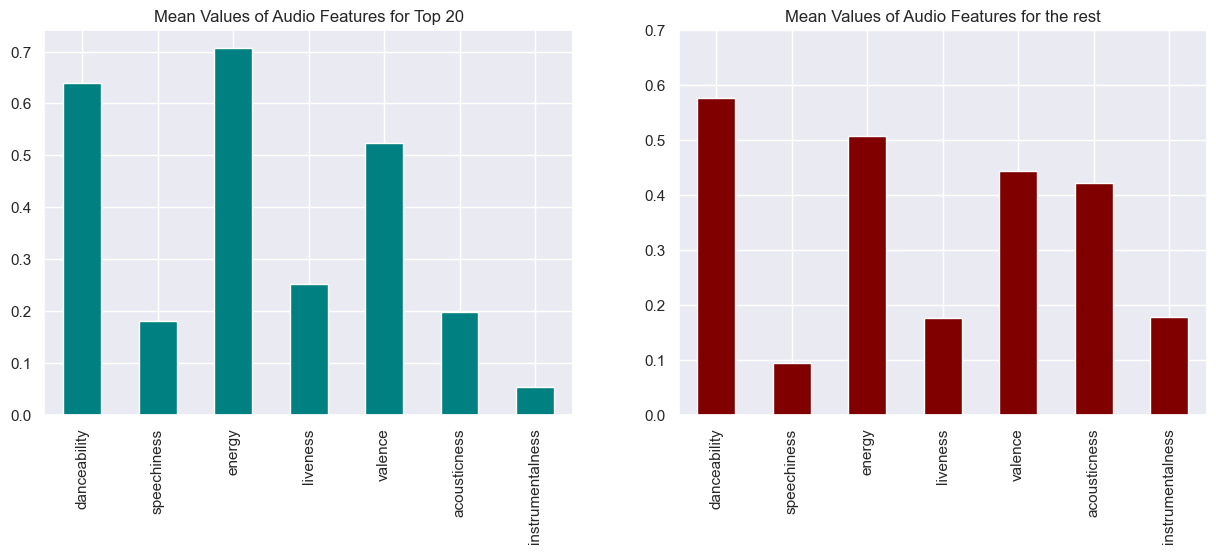

In [228]:
x_columns={'danceability','energy', 'valence','instrumentalness', 'acousticness', 'speechiness', 'liveness'}
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Mean Values of Audio Features for Top 20')
df_top_20[x_columns].mean().plot.bar(color='Teal')

plt.subplot(1, 2, 2)
plt.title('Mean Values of Audio Features for the rest')
df_the_rest[x_columns].mean().plot.bar(color='Maroon')
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7])

plt.show()

There seems to be inconsistency/error in Spotify's data. **Speechiness** is on a scale of 0-1. 
- 1 being exclusively speech such as talkshows or podcasts
- 0.66 and above is for track probably made of verbal words
- Between 0.33 and 0.66 is both speech and music
- Below 0.33 represents music and instrumentals 

I find it odd for a data frame with tracks that include singing/rapping in almost every track to have very low **speechiness** mean. Let's leave it as it is for now, and I will check individual tracks/artists later.

<ipython-input-227-3c49a7b658a3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x_columns)


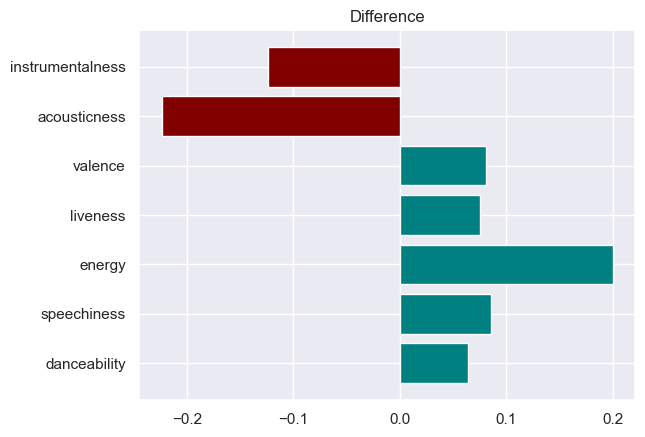

In [227]:
df=(df_top_20[x_columns].mean()-df_the_rest[x_columns].mean()).to_frame().reset_index()
df.columns=['category','values']

fig, ax = plt.subplots()
ax.barh(df['category'],
        df['values'],
       color=(df['values'] > 0).map({True: 'Teal', False: 'Maroon'}))
ax.set_yticklabels(x_columns)
plt.title('Difference')
plt.show()

My popular songs tend to have higher energy and speechiness. While the rest of my playlists have significantly higher instrumentalness and acousticness. This is because the rest of the songs have a broader range of genre and also tend to be instrumentals because I put on a random study playlist with a wide variety of artists. My top 20 artists are mostly from hiphop or rap genre hence the higher energy and speechiness.

This is backed up by the following comparison graph of the Standard Deviation of the two. The rest of my songs has higher standard deviation in 4 of the 6 categories, while the top 20 only has higher standard deviation in 'Liveness' and 'Speechiness'. This is kind of surprising because I expected the top 20 to have less standard deviation in 'Speechiness' because the majority are supposed to be in a genre with high 'Speechiness'.

<ipython-input-200-3b59a7fab2ab>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x_columns)


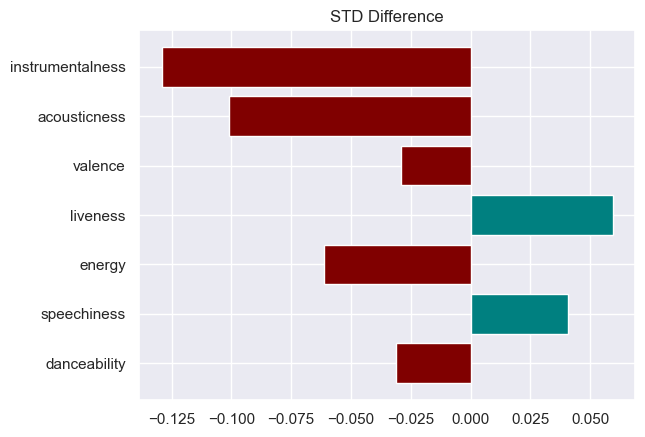

In [200]:
df=(np.std(df_top_20[x_columns])-np.std(df_the_rest[x_columns])).to_frame().reset_index()
df.columns=['category','values']

fig, ax = plt.subplots()
ax.barh(df['category'],
        df['values'],
       color=(df['values'] > 0).map({True: 'Teal', False: 'Maroon'}))
ax.set_yticklabels(x_columns)
plt.title('STD Difference')
plt.show()

<AxesSubplot:title={'center':'Total played time'}, xlabel='time', ylabel='artist'>

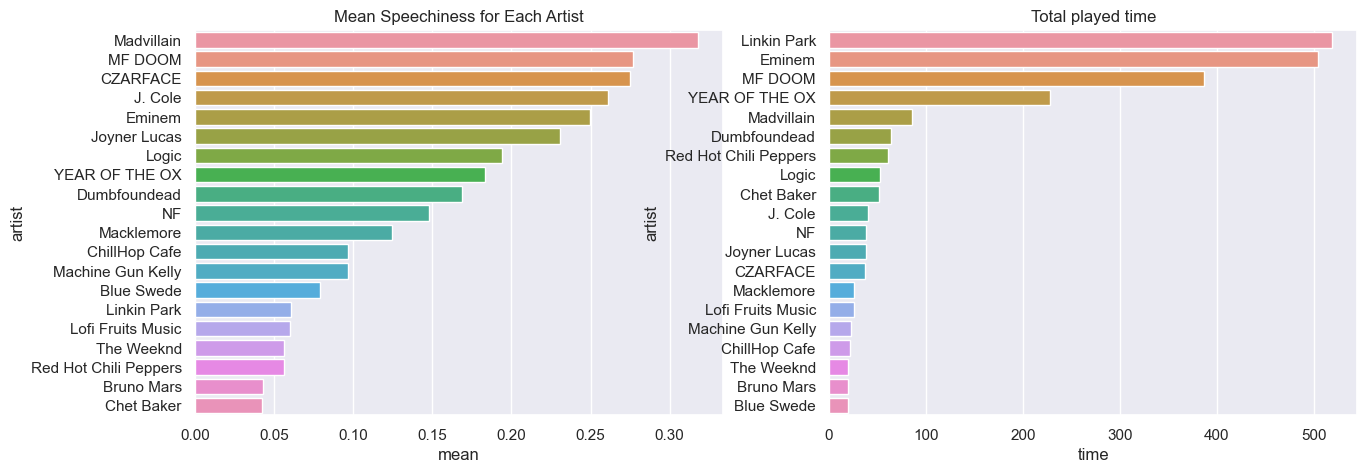

In [217]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df_speechiness= pd.DataFrame(df_top_20.groupby(['artist']).speechiness.agg(['mean']).sort_values(by='mean',ascending=False).reset_index())
plt.title("Mean Speechiness for Each Artist")
sns.barplot(y=df_speechiness['artist'],x=df_speechiness['mean'])


plt.subplot(1, 2, 2)
df_time=pd.DataFrame(df_top_20.groupby('artist')['time'].count().sort_index().sort_values(ascending=False).reset_index())
df_time.columns =['artist', 'time']
plt.title("Total played time")
sns.barplot(y=df_time['artist'], x=df_time['time'])


# Is my data wrong?

In [250]:
df_test=df_top_20
df_test=df_test.drop(['time_signature','end', 'uri', 'type'], axis=1)
df_test

,artist,track,time,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms
16,Linkin Park,What I've Done,0.203783,18lR4BzEs7e3qzc0KVkTpU,0.623,0.930,5.0,-5.285,1.0,0.0324,0.01410,0.000002,0.1380,0.287,120.119,https://api.spotify.com/v1/tracks/18lR4BzEs7e3...,https://api.spotify.com/v1/audio-analysis/18lR...,205613.0
18,Linkin Park,One More Light,0.205500,3xXBsjrbG1xQIm1xv1cKOt,0.593,0.200,8.0,-11.063,1.0,0.0311,0.90400,0.000000,0.0897,0.170,83.966,https://api.spotify.com/v1/tracks/3xXBsjrbG1xQ...,https://api.spotify.com/v1/audio-analysis/3xXB...,255067.0
23,Linkin Park,Breaking the Habit,0.209500,3dxiWIBVJRlqh9xk144rf4,0.579,0.849,4.0,-5.218,0.0,0.0303,0.10800,0.000000,0.0909,0.581,100.021,https://api.spotify.com/v1/tracks/3dxiWIBVJRlq...,https://api.spotify.com/v1/audio-analysis/3dxi...,196907.0
31,Linkin Park,Numb,0.225617,2nLtzopw4rPReszdYBJU6h,0.496,0.863,9.0,-4.153,1.0,0.0381,0.00460,0.000000,0.6390,0.243,110.018,https://api.spotify.com/v1/tracks/2nLtzopw4rPR...,https://api.spotify.com/v1/audio-analysis/2nLt...,185587.0
36,Linkin Park,In the End,0.245267,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,0.0454,0.19600,0.000000,0.0830,0.301,174.152,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0
3344,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,0.0454,0.19600,0.000000,0.0830,0.301,174.152,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0
3345,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,0.0454,0.19600,0.000000,0.0830,0.301,174.152,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0
3346,Bruno Mars,Versace on the Floor,4.354000,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,2.0,-6.209,1.0,0.0454,0.19600,0.000000,0.0830,0.301,174.152,https://api.spotify.com/v1/tracks/0kN8xEmgMW9m...,https://api.spotify.com/v1/audio-analysis/0kN8...,261240.0


In [251]:
df_test.loc[df_test['artist'] == 'Eminem'].head()

,artist,track,time,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms
4,Eminem,Darkness,0.174917,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.623,2.0,-7.161,1.0,0.3080,0.00998,0.000008,0.643,0.195,75.055,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0
12,Eminem,Higher,0.188167,6oJ6le65B3SEqPwMRNXWjY,0.693,0.678,8.0,-7.159,1.0,0.0324,0.01510,0.000006,0.101,0.404,103.952,https://api.spotify.com/v1/tracks/6oJ6le65B3SE...,https://api.spotify.com/v1/audio-analysis/6oJ6...,228267.0
19,Eminem,Tonya - Skit,0.206383,1meOg8wHrLsxqD4mwW2YM2,0.574,0.969,6.0,-4.410,1.0,0.3320,0.29400,0.000000,0.458,0.168,78.238,https://api.spotify.com/v1/tracks/1meOg8wHrLsx...,https://api.spotify.com/v1/audio-analysis/1meO...,42227.0
20,Eminem,Thus Far - Interlude,0.207250,435kMcZJuXJJwKelsDjP4R,0.635,0.469,0.0,-13.466,1.0,0.5360,0.86700,0.000010,0.784,0.892,85.749,https://api.spotify.com/v1/tracks/435kMcZJuXJJ...,https://api.spotify.com/v1/audio-analysis/435k...,16355.0
29,Eminem,Darkness,0.218650,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.623,2.0,-7.161,1.0,0.3080,0.00998,0.000008,0.643,0.195,75.055,https://api.spotify.com/v1/tracks/5SiZJoLXp3WO...,https://api.spotify.com/v1/audio-analysis/5SiZ...,337147.0


In [253]:
df_test.loc[df_test['artist'] == 'ChillHop Cafe'].head()

,artist,track,time,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms
234,ChillHop Cafe,Japanese Morning Beat,0.726000,019MG7V1bfDbSxOn00HeVh,0.742,0.459,1.0,-8.189,1.0,0.0440,0.893,0.590,0.099,0.653,78.011,https://api.spotify.com/v1/tracks/019MG7V1bfDb...,https://api.spotify.com/v1/audio-analysis/019M...,90760.0
331,ChillHop Cafe,Chillhop Summer,1.129333,76cW3bYfOwG6lZIPF6bUBr,0.639,0.364,9.0,-8.378,0.0,0.0956,0.946,0.537,0.320,0.517,86.941,https://api.spotify.com/v1/tracks/76cW3bYfOwG6...,https://api.spotify.com/v1/audio-analysis/76cW...,67761.0
337,ChillHop Cafe,Lofi Sleep Music - Instrumental Beat,1.170433,4TK3qP7gcx7SuAMXCEOh6L,0.749,0.346,7.0,-11.014,1.0,0.1020,0.248,0.652,0.122,0.493,75.000,https://api.spotify.com/v1/tracks/4TK3qP7gcx7S...,https://api.spotify.com/v1/audio-analysis/4TK3...,117584.0
350,ChillHop Cafe,Sleep For Days,1.214300,69efbn93uutD3VyppjFsAL,0.720,0.386,7.0,-8.725,1.0,0.0553,0.721,0.303,0.105,0.650,82.009,https://api.spotify.com/v1/tracks/69efbn93uutD...,https://api.spotify.com/v1/audio-analysis/69ef...,72859.0
351,ChillHop Cafe,Sleep For Days,1.214300,69efbn93uutD3VyppjFsAL,0.720,0.386,7.0,-8.725,1.0,0.0553,0.721,0.303,0.105,0.650,82.009,https://api.spotify.com/v1/tracks/69efbn93uutD...,https://api.spotify.com/v1/audio-analysis/69ef...,72859.0


In [257]:
df_test.loc[df_test['artist'] == 'MF DOOM'].head(20)

,artist,track,time,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms
1,MF DOOM,BATTY BOYZ,0.173100,4c8PKBYZm3OVF5boel6Q4c,0.669,0.712,9.0,-4.508,1.0,0.4750,0.2910,0.000000,0.1170,0.839,119.831,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0
6,MF DOOM,BUMPY'S MESSAGE,0.175733,5cpGo1hrePIJFtip7Xtdd0,0.733,0.328,7.0,-21.688,1.0,0.8730,0.9260,0.000145,0.6850,0.505,83.168,https://api.spotify.com/v1/tracks/5cpGo1hrePIJ...,https://api.spotify.com/v1/audio-analysis/5cpG...,95947.0
9,MF DOOM,LIGHTWORKS,0.181500,2IDp0BQ8Jo5BIYNA9t9Eka,0.714,0.522,1.0,-7.283,1.0,0.0388,0.1580,0.896000,0.1360,0.211,91.004,https://api.spotify.com/v1/tracks/2IDp0BQ8Jo5B...,https://api.spotify.com/v1/audio-analysis/2IDp...,168791.0
11,MF DOOM,Hoe Cakes,0.187683,40155dfa7olSEyn4voiTSB,0.511,0.613,1.0,-6.371,1.0,0.3210,0.0987,0.000000,0.1440,0.950,92.184,https://api.spotify.com/v1/tracks/40155dfa7olS...,https://api.spotify.com/v1/audio-analysis/4015...,234147.0
13,MF DOOM,THAT'S THAT,0.188217,3ZWc3Bm8eUMRRJhSWKHHeV,0.499,0.728,8.0,-4.922,0.0,0.3850,0.2350,0.000000,0.6860,0.853,96.089,https://api.spotify.com/v1/tracks/3ZWc3Bm8eUMR...,https://api.spotify.com/v1/audio-analysis/3ZWc...,135067.0
21,MF DOOM,Om - Edit,0.207833,4XxkCL8qAoz8vZ2g5JdvAl,0.636,0.793,2.0,-7.590,1.0,0.2190,0.2100,0.000000,0.1380,0.532,98.884,https://api.spotify.com/v1/tracks/4XxkCL8qAoz8...,https://api.spotify.com/v1/audio-analysis/4Xxk...,151580.0
22,MF DOOM,Mean the Most - Edit,0.207917,1VTIAfT8ASDwlDcY9a5pX0,0.437,0.518,7.0,-11.311,1.0,0.1620,0.3040,0.000000,0.1220,0.849,176.573,https://api.spotify.com/v1/tracks/1VTIAfT8ASDw...,https://api.spotify.com/v1/audio-analysis/1VTI...,179815.0
24,MF DOOM,Doomsday,0.214433,7lT1dCz96jANsLAAADlfIg,0.856,0.841,6.0,-7.737,0.0,0.3350,0.0977,0.000000,0.0773,0.794,95.418,https://api.spotify.com/v1/tracks/7lT1dCz96jAN...,https://api.spotify.com/v1/audio-analysis/7lT1...,298053.0
25,MF DOOM,BATTY BOYZ,0.215000,4c8PKBYZm3OVF5boel6Q4c,0.669,0.712,9.0,-4.508,1.0,0.4750,0.2910,0.000000,0.1170,0.839,119.831,https://api.spotify.com/v1/tracks/4c8PKBYZm3OV...,https://api.spotify.com/v1/audio-analysis/4c8P...,196120.0
55,MF DOOM,Intermission,0.262167,4aZAPDkfyjOn6CCIJzqsLy,0.407,0.419,3.0,-21.222,0.0,0.5080,0.9610,0.895000,0.3930,0.490,171.003,https://api.spotify.com/v1/tracks/4aZAPDkfyjOn...,https://api.spotify.com/v1/audio-analysis/4aZA...,62313.0


In [256]:
df_test.loc[df_test['artist'] == 'Chet Baker'].head()

,artist,track,time,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms
459,Chet Baker,If You Could See Me Now,1.557833,6EzSy7WxNCazx3csu7lxdV,0.602,0.75800,0.0,-6.864,1.0,0.0399,0.00569,0.000000,0.145,0.368,100.017,https://api.spotify.com/v1/tracks/6EzSy7WxNCaz...,https://api.spotify.com/v1/audio-analysis/6EzS...,219547.0
831,Chet Baker,Autumn Leaves,2.234350,7iBSkXB0pTvZasOLf0Qxk9,0.555,0.25700,10.0,-12.637,1.0,0.0299,0.89200,0.000001,0.124,0.431,89.013,https://api.spotify.com/v1/tracks/7iBSkXB0pTvZ...,https://api.spotify.com/v1/audio-analysis/7iBS...,200756.0
905,Chet Baker,My Funny Valentine,2.352217,4l9hml2UCnxoNI3yCdL1BW,0.438,0.00756,0.0,-26.440,0.0,0.0382,0.94100,0.006430,0.109,0.277,133.320,https://api.spotify.com/v1/tracks/4l9hml2UCnxo...,https://api.spotify.com/v1/audio-analysis/4l9h...,141133.0
1333,Chet Baker,Time After Time - Vocal Version,2.779333,4m6OC8u2rC6LMFtFWsME7d,0.501,0.04540,0.0,-18.783,1.0,0.0388,0.93800,0.000038,0.200,0.255,99.783,https://api.spotify.com/v1/tracks/4m6OC8u2rC6L...,https://api.spotify.com/v1/audio-analysis/4m6O...,166760.0
1334,Chet Baker,Time After Time - Vocal Version,2.779333,4m6OC8u2rC6LMFtFWsME7d,0.501,0.04540,0.0,-18.783,1.0,0.0388,0.93800,0.000038,0.200,0.255,99.783,https://api.spotify.com/v1/tracks/4m6OC8u2rC6L...,https://api.spotify.com/v1/audio-analysis/4m6O...,166760.0


I have selected 4 very different sounding artists. First, I will double check if the data is correct.

## Check ID with actual URL

**Eminem-Darkness**<br>
ID in dataframe: **5SiZJoLXp3WOl3J4C8IK0d**<br>
https://open.spotify.com/track/5SiZJoLXp3WOl3J4C8IK0d

**Chillhop Cafe-Sleep for Days** <br>
ID in dataframe: **69efbn93uutD3VyppjFsAL**<br>
https://open.spotify.com/track/69efbn93uutD3VyppjFsAL

**MF DOOM-Lightworks**<br>
ID in dataframe: **2IDp0BQ8Jo5BIYNA9t9Eka**<br>
https://open.spotify.com/track/2IDp0BQ8Jo5BIYNA9t9Ekab<br>
**The function grabbed the data from the wrong song. (will come back to this later)** 

**MF DOOM-Doomsday**<br>
ID in dataframe: **7lT1dCz96jANsLAAADlfIg**<br>
https://open.spotify.com/track/7lT1dCz96jANsLAAADlfIg

**CHet Baker-My Funny Valentine**<br>
ID in dataframe **4l9hml2UCnxoNI3yCdL1BW**<br>
https://open.spotify.com/track/4l9hml2UCnxoNI3yCdL1BW

## Check Features

**Eminem-Darkness** 

This is one of his more lyrical tracks, yet Speechiness level is only 0.308. According to Spotify's definition, around 0.33-0.66 is a mixture of vocals and instruments so this seems really low for a song with 1002 words (I put the lyrics into a word counter).

In [266]:
get_features('5SiZJoLXp3WOl3J4C8IK0d', token)

{'danceability': 0.671,
 'energy': 0.623,
 'key': 2,
 'loudness': -7.161,
 'mode': 1,
 'speechiness': 0.308,
 'acousticness': 0.00998,
 'instrumentalness': 7.55e-06,
 'liveness': 0.643,
 'valence': 0.195,
 'tempo': 75.055,
 'type': 'audio_features',
 'id': '5SiZJoLXp3WOl3J4C8IK0d',
 'uri': 'spotify:track:5SiZJoLXp3WOl3J4C8IK0d',
 'track_href': 'https://api.spotify.com/v1/tracks/5SiZJoLXp3WOl3J4C8IK0d',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5SiZJoLXp3WOl3J4C8IK0d',
 'duration_ms': 337147,
 'time_signature': 4}

**Chillhop Cafe-Sleep for Days**

It's a purely instrumental Lofi Hip Hop track so Speechiness level here is fairly accurate. However, instrumentalness which predicts the lack of vocal content on a scale of 0-1 is surprisingly low for a song with no vocals.

In [259]:
get_features('69efbn93uutD3VyppjFsAL', token)

{'danceability': 0.72,
 'energy': 0.386,
 'key': 7,
 'loudness': -8.725,
 'mode': 1,
 'speechiness': 0.0553,
 'acousticness': 0.721,
 'instrumentalness': 0.303,
 'liveness': 0.105,
 'valence': 0.65,
 'tempo': 82.009,
 'type': 'audio_features',
 'id': '69efbn93uutD3VyppjFsAL',
 'uri': 'spotify:track:69efbn93uutD3VyppjFsAL',
 'track_href': 'https://api.spotify.com/v1/tracks/69efbn93uutD3VyppjFsAL',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/69efbn93uutD3VyppjFsAL',
 'duration_ms': 72859,
 'time_signature': 4}

**MF DOOM** 

Here, I discovered an error in the *get_feautres* function. It assumed the first result is the correct one. However, in this case, the song was *LIGHTWORKS*, but the ID is for a different song *Lightworks in the Morning* So there is a possibility that the rest of the dataset might have errors too. In the future, I will have to use the artist as part of the search parameters to make sure the data is accurate. 

**Doomsday**
Similiar to Eminem's Darkness, the Speechiness level is at a minimum of 0.335. I believe this is low for a song with a word count of almost 700 words. 

In [267]:
get_features('7lT1dCz96jANsLAAADlfIg', token)

{'danceability': 0.856,
 'energy': 0.841,
 'key': 6,
 'loudness': -7.737,
 'mode': 0,
 'speechiness': 0.335,
 'acousticness': 0.0977,
 'instrumentalness': 0,
 'liveness': 0.0773,
 'valence': 0.794,
 'tempo': 95.418,
 'type': 'audio_features',
 'id': '7lT1dCz96jANsLAAADlfIg',
 'uri': 'spotify:track:7lT1dCz96jANsLAAADlfIg',
 'track_href': 'https://api.spotify.com/v1/tracks/7lT1dCz96jANsLAAADlfIg',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7lT1dCz96jANsLAAADlfIg',
 'duration_ms': 298053,
 'time_signature': 4}

**Chet Baker-My Funny Valentine**

It is a quiet song with vocals, very light drum and piano. Both speechiness and instrumentalness is really low, which I believe is due to the quiet nature of the song.

In [265]:
get_features('4l9hml2UCnxoNI3yCdL1BW', token)

{'danceability': 0.438,
 'energy': 0.00756,
 'key': 0,
 'loudness': -26.44,
 'mode': 0,
 'speechiness': 0.0382,
 'acousticness': 0.941,
 'instrumentalness': 0.00643,
 'liveness': 0.109,
 'valence': 0.277,
 'tempo': 133.32,
 'type': 'audio_features',
 'id': '4l9hml2UCnxoNI3yCdL1BW',
 'uri': 'spotify:track:4l9hml2UCnxoNI3yCdL1BW',
 'track_href': 'https://api.spotify.com/v1/tracks/4l9hml2UCnxoNI3yCdL1BW',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4l9hml2UCnxoNI3yCdL1BW',
 'duration_ms': 141133,
 'time_signature': 4}

In [291]:
df_test.loc[df_test['speechiness'] >0.5].count()

artist              47
track               47
time                47
id                  47
danceability        47
energy              47
key                 47
loudness            47
mode                47
speechiness         47
acousticness        47
instrumentalness    47
liveness            47
valence             47
tempo               47
track_href          47
analysis_url        47
duration_ms         47
dtype: int64

In the entire top 20 group of songs, there are only 47 songs above 0.5 'speechiness'. Perhaps I am misunderstanding it.  Upon further research, it does not really represent how vocal the song is but rather how close is it to being purely vocal (which is 1). For example, a song with 0.2 speechiness does not mean very little vocals but it means it has a very low chance of being purely vocals. However, I believe this makes the lower values confusing and does not really differentiate between purely insturmental songs with vocals+instruments. 

**Conclusion**

It was a fun experiment collecting my own data, organizing it, cleaning it, and finally analyzing and learning about it. There are certain improvements to be made for next time. 

1. Include artist's name in the parameters when grabbing the track ID for tracks that have the same name between multiple artists. 
2. Find another person to volunteer their data and compare their overall listening habits to mine. 